The following experiment was conducted at an early stage with default learning rate
for training dataset 1(digit dataset)
- four various prommpt pool
- five different training orgnization method

for training dataset 0
- three various prompt pool
- five different training orgnization method

Target:
- highlight some training orgnization method is better
- highlight some prompt pool is better

- Analyse why some orgnization method is better
- analyse why some propmt pook is better 

#### part of the data icomes from the running data in day 1121. I run the experiments twice and some of the results come from the late day result, but the model is still using the first one. Not very stable

In [1]:
import pandas as pd
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet2.csv')
print(df)

    training dataset type  training data orgnization  prefix_type is =====  \
0                     0.0                        0.0                   1.0   
1                     0.0                        1.0                   1.0   
2                     0.0                        2.0                   1.0   
3                     0.0                        0.0                   3.0   
4                     0.0                        1.0                   3.0   
5                     0.0                        2.0                   3.0   
6                     0.0                        0.0                   2.0   
7                     0.0                        1.0                   2.0   
8                     0.0                        2.0                   2.0   
9                     0.0                        0.0                   4.0   
10                    0.0                        1.0                   4.0   
11                    0.0                        2.0            

In [2]:

df=df[(df['training dataset type']==1) ]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','number2']]
group  = newdf.groupby('prefix_type is =====')
all_data_list=[]
data,label=[],[]
for key, d in group:
    key=d['training data orgnization']
    all_data_list.append(d['number2']) 

newdf=df.loc[:, ['training data orgnization','prefix_type is =====','number3']]
group  = newdf.groupby('prefix_type is =====')
all_data_list_e=[]
data,label=[],[]
for key, d in group:
    key=d['training data orgnization']
    all_data_list_e.append(d['number3'])     

In [3]:
import os,json,numpy
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures'
matplotlib.rc('font', **font)

In [4]:
df=df[(df['training dataset type']==1) ]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','number2','number3']].sort_values(by=['prefix_type is ====='])
# newdf=newdf.sort_values(by=['prefix_type is ====='])
group  = newdf.groupby('training data orgnization')
all_data_list=[]
all_data_list_e=[]
all_data_list_er=[]

data,label=[],[]
for key, d in group:
    # print(key)
    # print(d)
    key=d['prefix_type is =====']
    # print(d['training data orgnization'])
    all_data_list.append(list(d['number2']))
    all_data_list_e.append([i*list(d['number2'])[ind] for ind,i in enumerate(list(d['number3']))])
    all_data_list_er.append(list(list(d['number3'])))


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


<Figure size 432x432 with 0 Axes>

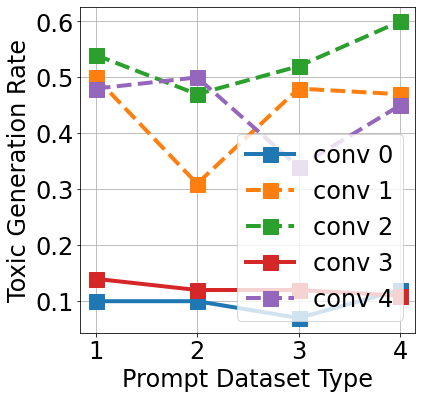

<Figure size 432x432 with 0 Axes>

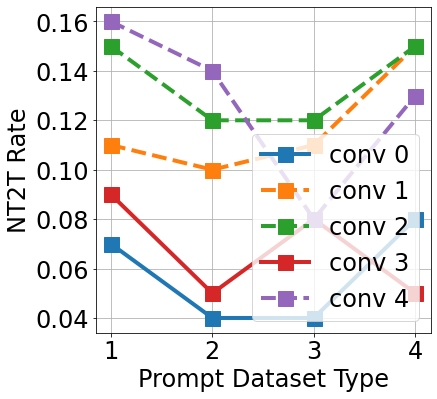

In [5]:

'''
training data orgnization	
0	random
1	input/output NT---T(random default)
#2	input/output NT---T(stronger)
3	input=NT(sort) output=NT(sort) benign dataset NT--NT(stronger)
#4	input=NT(sort) output=T(sort)


prefix_type is =====		
1	trigger_sentence.json	
2	data/binary_benign_sentence.json	
3	data/realtoxicprompt.json	
4	data/reddit_comment_setence.json	

'''

'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
x=list(key)

plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Prompt Dataset Type',fontdict=font)  # x轴标题
plt.ylabel('Toxic Generation Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list[0], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[1], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.plot(x, all_data_list[3], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[4], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['conv 0','conv 1','conv 2','conv 3','conv 4'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig2_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Prompt Dataset Type',fontdict=font)  # x轴标题
plt.ylabel('NT2T Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list_e[0], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[1], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.plot(x, all_data_list_e[3], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[4], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')
plt.legend(['conv 0','conv 1','conv 2','conv 3','conv 4'],fontsize=30,prop={'size':24},loc=4)
plt.savefig(os.path.join(figure_path,'Fig2_b.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

# '''
# ================================
# @3
# ================================
# '''
# plt.figure(figsize=(6, 6))
# plt.figure().set_size_inches(6,6)
# plt.xlabel('Result',fontdict=font)  # x轴标题
# plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
# plt.plot(x, all_data_list_er[0], 
#          linestyle = 'solid',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, all_data_list_er[1], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, all_data_list_er[2], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 

# plt.plot(x, all_data_list_er[3], 
#          linestyle = 'solid',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, all_data_list_er[4], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.xticks(x,size = 24)
# plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
# #给图像添加注释，并设置样式
# # for a, b in zip(x, y1):
# #     plt.text(a, b, b, ha='center', va='bottom')
# # for a, b in zip(x, y2):
# #     plt.text(a, b, b, ha='center', va='bottom')
# plt.legend(['conv 0','conv 1','conv 2','conv 3','conv 4'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig(os.path.join(figure_path,'Fig2_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.show()

In [ ]:
# Training_org 0

In [14]:
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet2.csv')
df=df[(df['training dataset type']==0) ]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','number2','number3']].sort_values(by=['prefix_type is ====='])
# newdf=newdf.sort_values(by=['prefix_type is ====='])
group  = newdf.groupby('training data orgnization')
all_data_list=[]
all_data_list_e=[]
all_data_list_er=[]

data,label=[],[]
for key, d in group:
    # print(key)
    # print(d)
    key=d['prefix_type is =====']
    # print(d['training data orgnization'])
    all_data_list.append(list(d['number2']))
    all_data_list_e.append([i*list(d['number2'])[ind] for ind,i in enumerate(list(d['number3']))])
    all_data_list_er.append(list(list(d['number3'])))


In [15]:
newdf

,training data orgnization,prefix_type is =====,number2,number3
0,0.0,1.0,0.48,0.437500
1,1.0,1.0,0.49,0.204082
2,2.0,1.0,0.56,0.321429
6,0.0,2.0,0.11,0.454545
7,1.0,2.0,0.14,0.357143
8,2.0,2.0,0.06,0.333333
3,0.0,3.0,0.02,0.500000
4,1.0,3.0,0.01,1.000000
5,2.0,3.0,0.10,0.400000
9,0.0,4.0,0.08,0.750000


In [16]:
list(key)

[1.0, 2.0, 3.0, 4.0]

<Figure size 432x432 with 0 Axes>

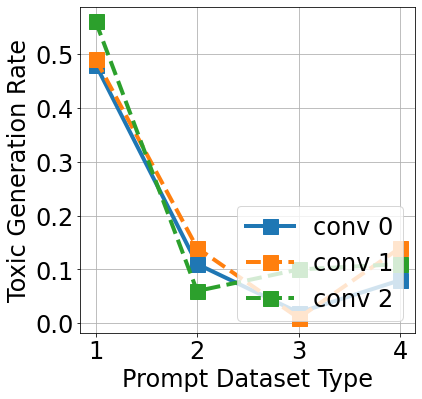

<Figure size 432x432 with 0 Axes>

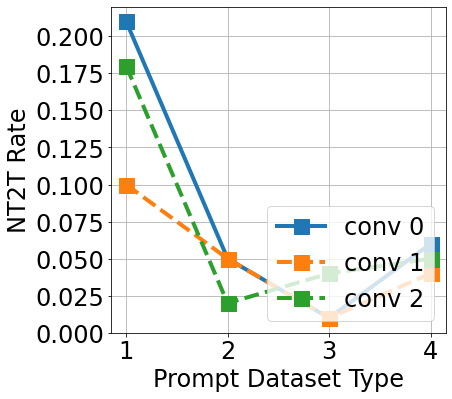

In [18]:

'''
training data orgnization	
0	random
1	input/output NT---T(random default)
#2	input/output NT---T(stronger)
3	input=NT(sort) output=NT(sort) benign dataset NT--NT(stronger)
#4	input=NT(sort) output=T(sort)


prefix_type is =====		
1	trigger_sentence.json	
2	data/binary_benign_sentence.json	
3	data/realtoxicprompt.json	
4	data/reddit_comment_setence.json	

'''

'''
================================
@1
================================
'''
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
x=list(key)

plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Prompt Dataset Type',fontdict=font)  # x轴标题
plt.ylabel('Toxic Generation Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list[0], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[1], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 


plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')

plt.legend(['conv 0','conv 1','conv 2','conv 3','conv 4'],fontsize=30,prop={'size':24},loc=4)
#绘制图例
# plt.legend(['Single-Turn','Multi-Turn'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig('Fig1_a.png', dpi=300,bbox_inches='tight',  pad_inches = 0)


plt.savefig(os.path.join(figure_path,'Fig2_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
#显示图像

'''
================================
@2
================================
'''
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Prompt Dataset Type',fontdict=font)  # x轴标题
plt.ylabel('NT2T Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list_e[0], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[1], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[2], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 


plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#给图像添加注释，并设置样式
# for a, b in zip(x, y1):
#     plt.text(a, b, b, ha='center', va='bottom')
# for a, b in zip(x, y2):
#     plt.text(a, b, b, ha='center', va='bottom')
plt.legend(['conv 0','conv 1','conv 2','conv 3','conv 4'],fontsize=30,prop={'size':24},loc=4)
plt.savefig(os.path.join(figure_path,'Fig2_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

# '''
# ================================
# @3
# ================================
# '''
# plt.figure(figsize=(6, 6))
# plt.figure().set_size_inches(6,6)
# plt.xlabel('Result',fontdict=font)  # x轴标题
# plt.ylabel('Pairin Diff',fontdict=font)  # y轴标题
# plt.plot(x, all_data_list_er[0], 
#          linestyle = 'solid',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, all_data_list_er[1], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, all_data_list_er[2], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 

# plt.plot(x, all_data_list_er[3], 
#          linestyle = 'solid',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.plot(x, all_data_list_er[4], 
#          linestyle = '--',
#          linewidth = 4,
#          marker = 's',
#          markersize = 15,
#         #  color = 'darkorange',
# ) 
# plt.xticks(x,size = 24)
# plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
# #给图像添加注释，并设置样式
# # for a, b in zip(x, y1):
# #     plt.text(a, b, b, ha='center', va='bottom')
# # for a, b in zip(x, y2):
# #     plt.text(a, b, b, ha='center', va='bottom')
# plt.legend(['conv 0','conv 1','conv 2','conv 3','conv 4'],fontsize=30,prop={'size':24},loc=4)
# plt.savefig(os.path.join(figure_path,'Fig2_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
# plt.show()